In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df_NACC = pd.read_csv('./investigator_nacc46.csv')

In [2]:
cols2FAQ =['BILLS', 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS','PAYATTN', 'REMDATES', 'TRAVEL']
col2NPIQ = ['DELSEV', 'HALLSEV', 'AGITSEV', 'DEPDSEV', 'ANXSEV', 'ELATSEV', 'APASEV', 'DISNSEV', \
         'IRRSEV', 'MOTSEV', 'NITESEV', 'APPSEV']

# Use the columns of interests for temporal understanding of score changes

In [24]:
df_score = df_NACC[(df_NACC['NACCMMSE']<=30)  & (df_NACC['NACCMMSE'] >=0) & (df_NACC['NACCAGEB'] >45) &\
             (df_NACC['MARISTAT'] !=9) &(df_NACC['NACCLIVS'] !=9) & (df_NACC['NACCUDSD'] !=2) & (df_NACC['NACCGDS'] !=-4) \
            &  (df_NACC['NACCGDS'] <=15) & (df_NACC['BILLS'] >=0)& (df_NACC['BILLS'] <=8) & (df_NACC['TAXES'] >=0)& \
            (df_NACC['TAXES'] <=8) & (df_NACC['SHOPPING'] >=0)& (df_NACC['SHOPPING'] <=8) & (df_NACC['GAMES'] >=0)& \
            (df_NACC['GAMES'] <=8) & (df_NACC['STOVE'] >=0)& (df_NACC['STOVE'] <=8) & (df_NACC['MEALPREP'] >=0)& \
            (df_NACC['MEALPREP'] <=8) & (df_NACC['EVENTS'] >=0)& (df_NACC['EVENTS'] <=8) & (df_NACC['PAYATTN'] >=0)&\
            (df_NACC['PAYATTN'] <=8) & (df_NACC['REMDATES'] >=0)& (df_NACC['REMDATES'] <=8) & (df_NACC['TRAVEL'] >=0)& \
            (df_NACC['TRAVEL'] <=8) & (df_NACC['DELSEV'] >=1)& (df_NACC['DELSEV'] <=8) &(df_NACC['HALLSEV'] >=1)&\
            (df_NACC['HALLSEV'] <=8) &(df_NACC['AGITSEV'] >=1)& (df_NACC['AGITSEV'] <=8) &(df_NACC['DEPDSEV'] >=1)\
            & (df_NACC['DEPDSEV'] <=8) &(df_NACC['ANXSEV'] >=1)& (df_NACC['ANXSEV'] <=8) &(df_NACC['ELATSEV'] >=1)& \
            (df_NACC['ELATSEV'] <=8) &(df_NACC['APASEV'] >=1)& (df_NACC['APASEV'] <=8) &(df_NACC['DISNSEV'] >=1)& \
            (df_NACC['DISNSEV'] <=8) & (df_NACC['IRRSEV'] >=1)& (df_NACC['IRRSEV'] <=8) &(df_NACC['MOTSEV'] >=1)& \
            (df_NACC['MOTSEV'] <=8) & (df_NACC['NITESEV'] >=1)& (df_NACC['NITESEV'] <=8) &(df_NACC['APPSEV'] >=1)& \
            (df_NACC['APPSEV'] <=8)]\
         [['NACCID', 'VISITMO','VISITYR', 'NACCVNUM', 'NACCAVST','SEX', 'MARISTAT','NACCLIVS', 'NACCAGEB','CDRSUM', 'NACCMMSE','BILLS', 'TAXES', 'SHOPPING', 'GAMES', \
           'STOVE', 'MEALPREP', 'EVENTS','PAYATTN', 'REMDATES', 'TRAVEL', 'DELSEV', 'HALLSEV', 'AGITSEV', 'DEPDSEV', \
           'ANXSEV', 'ELATSEV', 'APASEV', 'DISNSEV', 'IRRSEV', 'MOTSEV', 'NITESEV', 'APPSEV',\
           'NACCGDS', 'DEMENTED', 'NACCUDSD']]
df_score =df_score.reset_index(drop= True)

In [ ]:
df_score.head()

# convert all values in NPQ-I from 8 to 0

In [ ]:
def assignvalue(value):
    if value ==8:
        return 0
    else:
        return value
list_item =['DELSEV', 'HALLSEV', 'AGITSEV', 'DEPDSEV', 'ANXSEV', 'ELATSEV', 'APASEV', 'DISNSEV', 'IRRSEV', 'MOTSEV', \
            'NITESEV', 'APPSEV']
for l in list_item:
    df_score[l]=df_score[l].apply(assignvalue )

# Add the NPI scores and drop the individual categories

In [ ]:
df_score['NPI_SUM'] = df_score[col2NPIQ].sum(axis =1)
df_score= df_score.drop(col2NPIQ, axis =1)
df_score.shape
df_score.head()

In [ ]:
df_score.groupby('NACCVNUM').size()

# Add the FAQ scores and drop the individual categories

In [27]:
df_score['FAQ_SUM'] = df_score[cols2FAQ].sum(axis =1)
df_score= df_score.drop(cols2FAQ, axis =1)
df_score.shape

(83664, 16)

# Total number of patients

In [ ]:
len(df_score['NACCID'].unique())

In [19]:
df_score.head()

,NACCID,VISITMO,VISITYR,NACCVNUM,NACCAVST,SEX,MARISTAT,NACCLIVS,NACCAGEB,CDRSUM,NACCMMSE,NACCGDS,DEMENTED,NACCUDSD,NPI_SUM,FAQ_SUM
0,NACC000385,11,2006,1,7,1,1,2,80,5.0,24,1,1,4,1,11
1,NACC000385,3,2008,2,7,1,1,2,80,7.0,22,2,1,4,0,22
2,NACC000385,3,2009,3,7,1,1,2,80,5.0,21,1,1,4,0,23
3,NACC000385,4,2010,4,7,1,1,2,80,5.0,20,1,1,4,4,15
4,NACC000385,1,2011,5,7,1,1,2,80,7.0,16,3,1,4,2,19


# Convert NACCUDSD to categorical values

In [20]:
df_score['NACCUDSD'] = df_score['NACCUDSD'].replace([1,3,4], ['NC','MCI', 'Dementia']) # Target variable

# dropping rows with low counts on categories and more data cleaning

In [ ]:
df_score.groupby('MARISTAT').size().sort_values(ascending= False)

In [ ]:
df_score.head()

In [172]:
df_score= df_score.groupby('MARISTAT').filter(lambda x : len(x)> 400)
df_score= df_score.groupby('NACCLIVS').filter(lambda x : len(x)> 500)
df_score =df_score.reset_index(drop = True)

In [57]:
# Patient_list = df_score['NACCID'].unique()

In [173]:
df_score.shape

(83664, 16)

In [11]:
pat_list =df_score[(df_score['NACCUDSD']==1) &(df_score['NACCVNUM']==5)]['NACCID'].to_list()

In [12]:
df_firstvisit_dem =df_score[df_score['NACCID'].isin(pat_list)] 

In [ ]:
#test = df_firstvisit_dem.groupby('NACCID').filter(lambda x : len(x)==5)
test = df_firstvisit_dem.groupby('NACCID').filter(lambda x : len(x) == 5)
pat_list=  test['NACCID'].to_list()
test.shape

In [203]:
test[test['NACCID'] == pat]['VISITYR']

2360    2010
2361    2011
2362    2012
2363    2013
2364    2014
Name: VISITYR, dtype: int64

In [ ]:
pat = pat_list[22]
plt.plot(test[test['NACCID'] == pat]['VISITYR'],test[test['NACCID'] == pat]['NACCMMSE'], '-r*')
plt.plot(test[test['NACCID'] == pat]['VISITYR'],test[test['NACCID'] == pat]['FAQ_SUM'], '--b^')
plt.plot(test[test['NACCID'] == pat]['VISITYR'],test[test['NACCID'] == pat]['CDRSUM'], '-mx')
plt.plot(test[test['NACCID'] == pat]['VISITYR'],test[test['NACCID'] == pat]['NPI_SUM'], '--k^')
plt.plot(test[test['NACCID'] == pat]['VISITYR'],test[test['NACCID'] == pat]['NACCGDS'], '-gx')
plt.plot(test[test['NACCID'] == pat]['VISITYR'],test[test['NACCID'] == pat]['NACCUDSD'], ':ro')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.legend(['MMSE score', 'FAQ score', 'CDR score', 'NPI-Q score', 'GDS score', 'NACCUDSD'])
plt.show()

In [ ]:
test

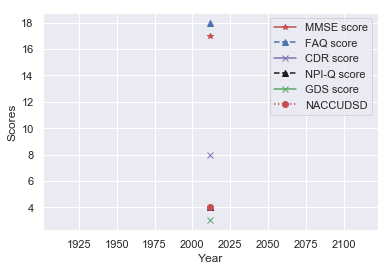

In [129]:
pat = pat_list[20]
plt.plot(df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['VISITYR'],df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['NACCMMSE'], '-r*')
plt.plot(df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['VISITYR'],df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['FAQ_SUM'], '--b^')
plt.plot(df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['VISITYR'],df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['CDRSUM'], '-mx')
plt.plot(df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['VISITYR'],df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['NPI_SUM'], '--k^')
plt.plot(df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['VISITYR'],df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['NACCGDS'], '-gx')
plt.plot(df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['VISITYR'],df_firstvisit_dem[df_firstvisit_dem['NACCID'] == pat]['NACCUDSD'], ':ro')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.legend(['MMSE score', 'FAQ score', 'CDR score', 'NPI-Q score', 'GDS score', 'NACCUDSD'])
plt.show()

In [131]:
df_firstvisit_dem[df_firstvisit_dem['NACCID']== pat]
df_score[df_score['NACCID']== pat]

,NACCID,VISITMO,VISITYR,NACCVNUM,NACCAVST,SEX,MARISTAT,NACCLIVS,NACCAGEB,CDRSUM,NACCMMSE,NACCGDS,DEMENTED,NACCUDSD,NPI_SUM,FAQ_SUM
101,NACC042723,11,2012,1,1,2,1,2,72,8.0,17,3,1,4,4,18


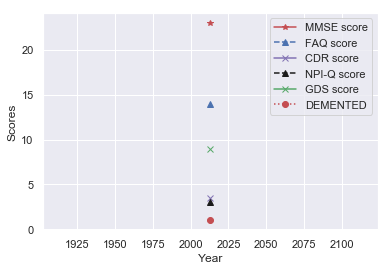

In [62]:
pat = 845
plt.plot(df_score[df_score['NACCID'] == Patient_list[pat]]['VISITYR'],df_score[df_score['NACCID'] == Patient_list[pat]]['NACCMMSE'], '-r*')
plt.plot(df_score[df_score['NACCID'] == Patient_list[pat]]['VISITYR'],df_score[df_score['NACCID'] == Patient_list[pat]]['FAQ_SUM'], '--b^')
plt.plot(df_score[df_score['NACCID'] == Patient_list[pat]]['VISITYR'],df_score[df_score['NACCID'] == Patient_list[pat]]['CDRSUM'], '-mx')
plt.plot(df_score[df_score['NACCID'] == Patient_list[pat]]['VISITYR'],df_score[df_score['NACCID'] == Patient_list[pat]]['NPI_SUM'], '--k^')
plt.plot(df_score[df_score['NACCID'] == Patient_list[pat]]['VISITYR'],df_score[df_score['NACCID'] == Patient_list[pat]]['NACCGDS'], '-gx')
plt.plot(df_score[df_score['NACCID'] == Patient_list[pat]]['VISITYR'],df_score[df_score['NACCID'] == Patient_list[pat]]['DEMENTED'], ':ro')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.legend(['MMSE score', 'FAQ score', 'CDR score', 'NPI-Q score', 'GDS score', 'DEMENTED'])
plt.show()

# Convert columns into categorical data

In [117]:
#Married status
df_SH['MARISTAT'] = df_SH['MARISTAT'].replace([1,2,3,5], ['Married','windowed', 'Divorced', 'Never Married']) # Target variable
#
df_SH['NACCLIVS'] = df_SH['NACCLIVS'].replace([1,2,3], ['Lives alone','Lives with spouse or partner', 'Lives with relative or friend']) # Target variable

df_SH['SEX'] = df_SH['SEX'].replace([1,2], ['M','F']) # Target variable

df_SH['CVHATT'] = df_SH['CVHATT'].replace([0,1,2], ['Absent','Active', 'Inactive']) # Target variable

df_SH['ALCOHOL'] = df_SH['ALCOHOL'].replace([0,1,2], ['Absent','Active', 'Inactive']) # Target variable

df_SH['NACCMOM'] = df_SH['NACCMOM'].replace([0,1], ['No','Yes']) # Target variable
df_SH['NACCDAD'] = df_SH['NACCDAD'].replace([0,1], ['No','Yes']) # Target variable
df_SH['NACCFADM'] = df_SH['NACCFADM'].replace([0,1], ['No','Yes']) # Target variable
#df_SH['DEMENTED'] = df_SH['DEMENTED'].replace([0,1], ['NonDemented','Demented']) # Target variable